# Random Forest Example using Census Income Dataset
- data from https://archive.ics.uci.edu/ml/datasets/Census+Income

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

import pandas
import numpy
numpy.random.seed = 0

import seaborn
seaborn.set(rc = {"figure.figsize" : (15,8)}, font_scale = 1.5)
seaborn.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Import Data 

In [2]:
data = pandas.read_excel("/users/danielcorcoran/desktop/github_repos/\
python_nb_sklearn_random_forest/census_income/census_income.xlsx")

In [3]:
data.head()

,age,workclass,fnlweight,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income-band
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
for column in data.columns:
    data_type = data[column].dtype
    if data_type == "object":
        print(column, " is of datatype object, will proceed by trimming column contents")
        data[column] = data[column].astype(str).str.strip()

workclass  is of datatype object, will proceed by trimming column contents
education  is of datatype object, will proceed by trimming column contents
marital-status  is of datatype object, will proceed by trimming column contents
occupation  is of datatype object, will proceed by trimming column contents
relationship  is of datatype object, will proceed by trimming column contents
race  is of datatype object, will proceed by trimming column contents
gender  is of datatype object, will proceed by trimming column contents
native-country  is of datatype object, will proceed by trimming column contents
income-band  is of datatype object, will proceed by trimming column contents


## Exploration

### Visualization 

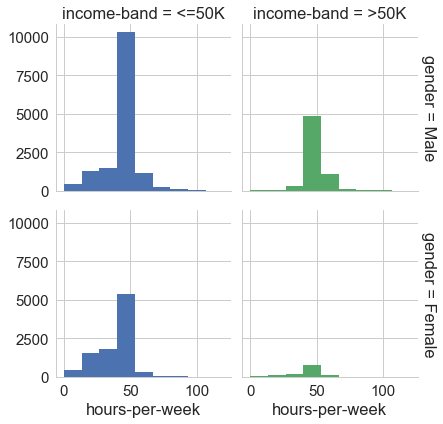

In [5]:
g = seaborn.FacetGrid(data, 
                      row="gender", 
                      col="income-band", 
                      margin_titles=True,
                      hue = "income-band"
                     )

bins = numpy.linspace(0, 120, 10)

g.map(plt.hist, "hours-per-week", bins=bins)

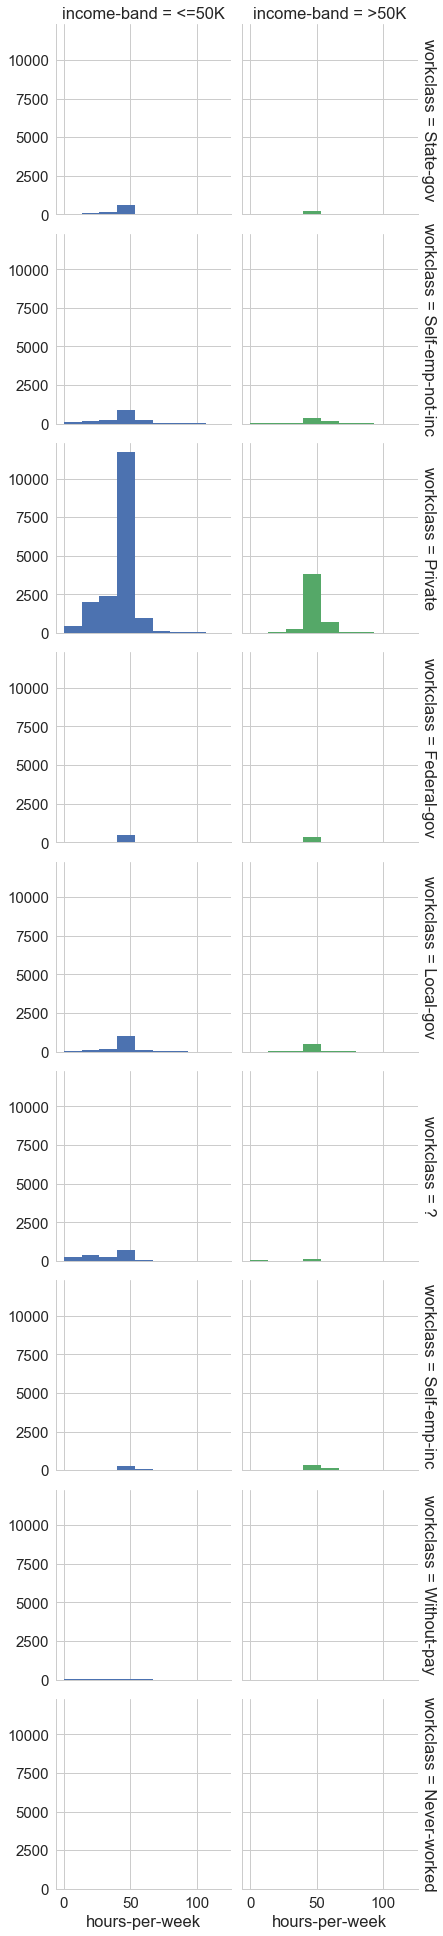

In [6]:
g = seaborn.FacetGrid(data, 
                      row="workclass",
                      col="income-band", 
                      margin_titles=True,
                      hue = "income-band"
                     )

bins = numpy.linspace(0, 120, 10)

g.map(plt.hist, "hours-per-week", bins=bins)

### Inspecting Statistical Summary

In [7]:
data.describe()

,age,fnlweight,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlweight         32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income-band       32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Strip object columns

In [9]:
for column in data.columns:
    print(column, data[column].unique(),"\n","-" * 100 )

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 
 ----------------------------------------------------------------------------------------------------
workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 
 ----------------------------------------------------------------------------------------------------
fnlweight [ 77516  83311 215646 ...  34066  84661 257302] 
 ----------------------------------------------------------------------------------------------------
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 
 ----------------------------------------------------------------------------------------------

### Feature Engineering

#### Create bins for capital loss, capital gain and education num

In [10]:
education_bins = pandas.cut(data["education-num"], bins = 4) 
cap_loss_bins = pandas.cut(data["capital-loss"], bins = 4)
cap_gain_bins = pandas.cut(data["capital-gain"], bins = 4)
age_bins = pandas.cut(data["age"], bins = 10)
hours_bins = pandas.cut(data["hours-per-week"], bins = 6)

In [11]:
data = pandas.concat([data, education_bins.rename("education_num_bins"), 
                   cap_gain_bins.rename("capital_gain_bins"), 
                   cap_loss_bins.rename("capital_loss_bins"),
                  hours_bins.rename("hours_worked_bins"),
                  age_bins.rename("age_bins")],
                 axis  = 1)

In [12]:
data.drop(["education-num","occupation","capital-loss", "capital-gain", "age", "hours-per-week", "fnlweight"], axis = 1 , inplace = True)

#### Replace to condense categorical features

In [13]:
data["native-country"] = data["native-country"].replace({'United-States':'North America',
'Cuba':'South America',
'Jamaica':'South America',
'India':'Asia',
'?':'Other',
'Mexico':'South America',
'South':'South America',
'Puerto-Rico':'South America',
'Honduras':'South America',
'England':'United Kingdom',
'Canada':'North America',
'Germany':'Europe',
'Iran':'Asia',
'Philippines':'Asia',
'Italy':'Europe',
'Poland':'Europe',
'Columbia':'South America',
'Cambodia':'Asia',
'Thailand':'Asia',
'Ecuador':'South America',
'Laos':'Asia',
'Taiwan':'Asia',
'Haiti':'South America',
'Portugal':'South America',
'Dominican-Republic':'South America',
'El-Salvador':'South America',
'France':'Europe',
'Guatemala':'South America',
'China':'Asia',
'Japan':'Asia',
'Yugoslavia':'Europe',
'Peru':'South America',
'Outlying-US(Guam-USVI-etc)':'Other',
'Scotland':'United Kingdom',
'Trinadad&Tobago':'Other',
'Greece':'Europe',
'Nicaragua':'South America',
'Vietnam':'Asia',
'Hong':'Asia',
'Ireland':'United Kingdom',
'Hungary':'Europe',
'Holand-Netherlands':'Europe'})

In [14]:
data["workclass"]  = data["workclass"].replace({'Federal-gov':'Government',
                                                'State-gov':'Governement',
                                                'Local-gov':'Government'})

In [15]:
data = data[sorted(data.columns)]

In [16]:
data.head()

,age_bins,capital_gain_bins,capital_loss_bins,education,education_num_bins,gender,hours_worked_bins,income-band,marital-status,native-country,race,relationship,workclass
0,"(38.9, 46.2]","(-99.999, 24999.75]","(-4.356, 1089.0]",Bachelors,"(12.25, 16.0]",Male,"(33.667, 50.0]",<=50K,Never-married,North America,White,Not-in-family,Governement
1,"(46.2, 53.5]","(-99.999, 24999.75]","(-4.356, 1089.0]",Bachelors,"(12.25, 16.0]",Male,"(0.902, 17.333]",<=50K,Married-civ-spouse,North America,White,Husband,Self-emp-not-inc
2,"(31.6, 38.9]","(-99.999, 24999.75]","(-4.356, 1089.0]",HS-grad,"(8.5, 12.25]",Male,"(33.667, 50.0]",<=50K,Divorced,North America,White,Not-in-family,Private
3,"(46.2, 53.5]","(-99.999, 24999.75]","(-4.356, 1089.0]",11th,"(4.75, 8.5]",Male,"(33.667, 50.0]",<=50K,Married-civ-spouse,North America,Black,Husband,Private
4,"(24.3, 31.6]","(-99.999, 24999.75]","(-4.356, 1089.0]",Bachelors,"(12.25, 16.0]",Female,"(33.667, 50.0]",<=50K,Married-civ-spouse,South America,Black,Wife,Private


In [17]:
data = pandas.get_dummies(data)

In [18]:
data.head()

,"age_bins_(16.927, 24.3]","age_bins_(24.3, 31.6]","age_bins_(31.6, 38.9]","age_bins_(38.9, 46.2]","age_bins_(46.2, 53.5]","age_bins_(53.5, 60.8]","age_bins_(60.8, 68.1]","age_bins_(68.1, 75.4]","age_bins_(75.4, 82.7]","age_bins_(82.7, 90.0]",...,relationship_Unmarried,relationship_Wife,workclass_?,workclass_Governement,workclass_Government,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_Without-pay
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [19]:
data.columns

Index(['age_bins_(16.927, 24.3]', 'age_bins_(24.3, 31.6]',
       'age_bins_(31.6, 38.9]', 'age_bins_(38.9, 46.2]',
       'age_bins_(46.2, 53.5]', 'age_bins_(53.5, 60.8]',
       'age_bins_(60.8, 68.1]', 'age_bins_(68.1, 75.4]',
       'age_bins_(75.4, 82.7]', 'age_bins_(82.7, 90.0]',
       'capital_gain_bins_(-99.999, 24999.75]',
       'capital_gain_bins_(24999.75, 49999.5]',
       'capital_gain_bins_(49999.5, 74999.25]',
       'capital_gain_bins_(74999.25, 99999.0]',
       'capital_loss_bins_(-4.356, 1089.0]',
       'capital_loss_bins_(1089.0, 2178.0]',
       'capital_loss_bins_(2178.0, 3267.0]',
       'capital_loss_bins_(3267.0, 4356.0]', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Pro

### Create feature matrix and target vector

In [20]:
X = data.drop(['income-band_<=50K', 'income-band_>50K'], axis = 1)
y = data['income-band_>50K']

In [21]:
X.shape

(32561, 78)

In [22]:
X.head()

,"age_bins_(16.927, 24.3]","age_bins_(24.3, 31.6]","age_bins_(31.6, 38.9]","age_bins_(38.9, 46.2]","age_bins_(46.2, 53.5]","age_bins_(53.5, 60.8]","age_bins_(60.8, 68.1]","age_bins_(68.1, 75.4]","age_bins_(75.4, 82.7]","age_bins_(82.7, 90.0]",...,relationship_Unmarried,relationship_Wife,workclass_?,workclass_Governement,workclass_Government,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_Without-pay
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income-band_>50K, dtype: uint8

In [24]:
y.shape

(32561,)

### Instantiate model using RandomForestClassifier

In [25]:
clf = RandomForestClassifier(n_estimators = 100,
                             n_jobs = 2,
                            random_state = 0)


### Recursive Feature Elimination

In [26]:
# from sklearn.feature_selection import RFE
# rfe = RFE(clf, n_features_to_select = 50)
# rfe = rfe.fit(X, y)
# results = list(rfe.support_)

In [27]:
# rfe_data = pandas.concat([pandas.Series(results), pandas.Series(X.columns)], axis = 1)
# rfe_data.columns = ["flag", "column_name"]

In [28]:
# rfe_data

In [29]:
# relevant_columns = list(rfe_data[rfe_data["flag"] == True]["column_name"])
# relevant_columns

In [30]:
# X = X[relevant_columns]

### Split dataset into training and testing sets 

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                               random_state = 42,
                                               test_size = 0.30)

### Fit model to training data

In [32]:
clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predict against Xtest set using model

In [33]:
prediction = clf.predict(Xtest)

### Show Accuracy Score

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
acc = accuracy_score(prediction, ytest)

print("Accuracy of prediction against test data: {0:.2%}".format(acc))

Accuracy of prediction against test data: 82.74%


### Confusion Matrix, predicted vs true labels

Text(87.68,0.5,'Predicted label')

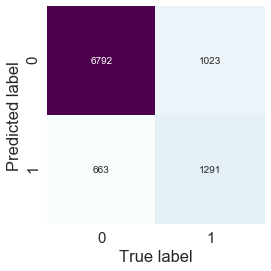

In [36]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(ytest, prediction)
seaborn.heatmap(matrix.T, 
                square = True, 
                annot = True, 
                fmt = "d", 
                cmap = "BuPu",
                cbar = False,
                xticklabels = list(ytest.unique()),
                yticklabels = list(ytest.unique()))

plt.xlabel("True label")
plt.ylabel("Predicted label")